In [1]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_X = np.genfromtxt("mnist_X.csv", delimiter=",")
data_label = np.genfromtxt("mnist_label.csv", delimiter=",")

In [3]:
def cov(X):
    N = X.shape[1]
    X = X - np.tile(X.mean(axis=1), (N, 1)).T
    return X @ X.T / (N - 1)


def PCA(X, label=None, dim=2, plot=True):
    if dim == 2:
        S = np.cov(X.T)
    else:
        S = cov(X.T)
    # Solve generalized eigenvalue problem
    eigval, eigvec = np.linalg.eig(S.T @ S)
    sorted_idx = np.argsort(eigval)[::-1]

    # Build projection matrix W
    W = []
    for i in range(dim):
        W.append(eigvec[:, sorted_idx[i]])
    W = np.array(W).T.real

    # Calculate result(Z = wX)
    Z = X @ W

    if plot:
        # Plot result
        plt.figure(figsize=(10, 7))
        for num in range(1, 6):
            plt.plot(Z[label == num, 0], Z[label == num, 1], ".", label=(str(num)))
        plt.title("PCA", fontsize=20)
        plt.legend(prop={"size": 14}, shadow=True)
        plt.savefig("PCA.png")
    else:
        return Z, W

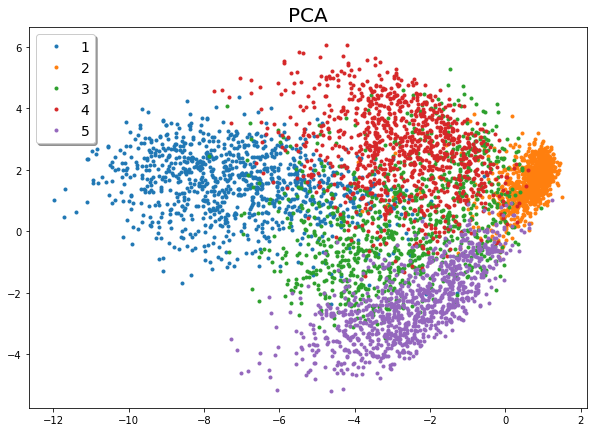

In [4]:
PCA(data_X, data_label)

In [5]:
def LDA(X, label):
    # Calculate mean of each class(Num 1~5)
    vector_mean = []
    for num in range(1, 6):
        vector_mean.append(np.mean(X[label == num], axis=0))
    vector_mean = np.array(vector_mean)

    # Calculate overall mean(for building Sb)
    overall_mean = np.mean(X, axis=0)

    # Compute Sw
    Sw = np.zeros((784, 784))
    for i, mu in zip(range(1, 6), vector_mean):
        within_data = X[label == i]
        Sw += (within_data - mu).T @ (within_data - mu)

    # Compute Sb
    Sb = np.zeros((784, 784))
    for i, mu in zip(range(1, 6), vector_mean):
        n = len(X[label == i])
        mu = mu.reshape(784, 1)
        overall_mean = overall_mean.reshape(784, 1)
        Sb += n * (mu - overall_mean) @ (mu - overall_mean).T

    # Solve generalized eigenvalue problem
    eigval, eigvec = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)
    sorted_idx = np.argsort(eigval)[::-1]

    # Build projection matrix W
    W = []
    for i in range(2):
        W.append(eigvec[:, sorted_idx[i]])
    W = np.array(W).T.real  # discard imaginary numbers
    Z = X @ W

    # Plot result
    plt.figure(figsize=(10, 7))
    for i in range(1, 6):
        plt.plot(Z[label == i, 0], Z[label == i, 1], ".", label=(str(i)))
    plt.title("LDA", fontsize=20)
    plt.legend(prop={"size": 14}, shadow=True)
    plt.savefig("LDA.png")

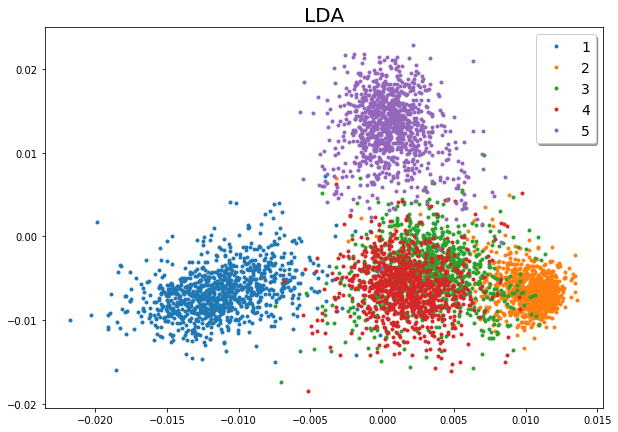

In [6]:
LDA(data_X, data_label)

In [7]:
import importlib
import tsne
importlib.reload(tsne)

<module 'tsne' from 'D:\\CS\\Github\\NCTU-CS-assignments\\ML_2019_Spring\\Hw7\\tsne.py'>

In [8]:
X, labels = tsne.load_data("mnist_X.csv", "mnist_label.csv")

load data.....


In [9]:
t_P_init, t_P, t_Q, t_Y = tsne.tsne(X, 2, 50, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 5000...
Computing P-values for point 500 of 5000...
Computing P-values for point 1000 of 5000...
Computing P-values for point 1500 of 5000...
Computing P-values for point 2000 of 5000...
Computing P-values for point 2500 of 5000...
Computing P-values for point 3000 of 5000...
Computing P-values for point 3500 of 5000...
Computing P-values for point 4000 of 5000...
Computing P-values for point 4500 of 5000...
Mean value of sigma: 1.799864
Iteration 100: error is 18.048323
Iteration 200: error is 1.943036
Iteration 300: error is 1.653558
Iteration 400: error is 1.526407
Iteration 500: error is 1.456443
Iteration 600: error is 1.412539
Iteration 700: error is 1.382439
Iteration 800: error is 1.360623
Iteration 900: error is 1.344140
Iteration 1000: error is 1.331242


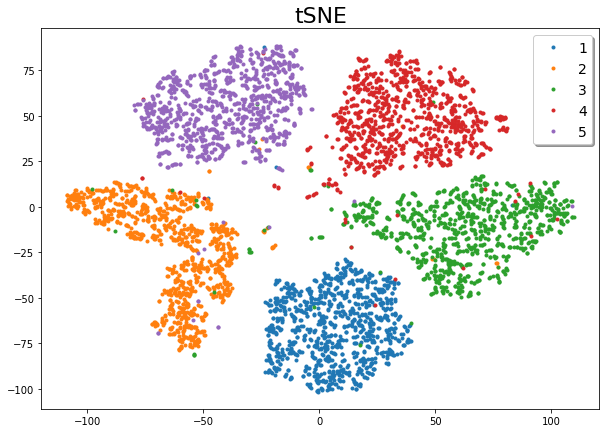

In [10]:
plt.figure(figsize=(10, 7))
for i in range(1, 6):
    data = t_Y[labels == i]
    plt.plot(data[:, 0], data[:, 1], ".", label=str(i))
plt.title("tSNE", fontsize=22)
plt.legend(prop={"size": 14}, shadow=True)
plt.savefig("tSNE.png")

In [11]:
s_P_init, s_P, s_Q, s_Y = tsne.ssne(X, 2, 50, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 5000...
Computing P-values for point 500 of 5000...
Computing P-values for point 1000 of 5000...
Computing P-values for point 1500 of 5000...
Computing P-values for point 2000 of 5000...
Computing P-values for point 2500 of 5000...
Computing P-values for point 3000 of 5000...
Computing P-values for point 3500 of 5000...
Computing P-values for point 4000 of 5000...
Computing P-values for point 4500 of 5000...
Mean value of sigma: 1.799864
Iteration 100: error is 17.932448
Iteration 200: error is 2.306430
Iteration 300: error is 2.303555
Iteration 400: error is 2.303955
Iteration 500: error is 2.304728
Iteration 600: error is 2.305111
Iteration 700: error is 2.302787
Iteration 800: error is 2.302395
Iteration 900: error is 2.302389
Iteration 1000: error is 2.302389


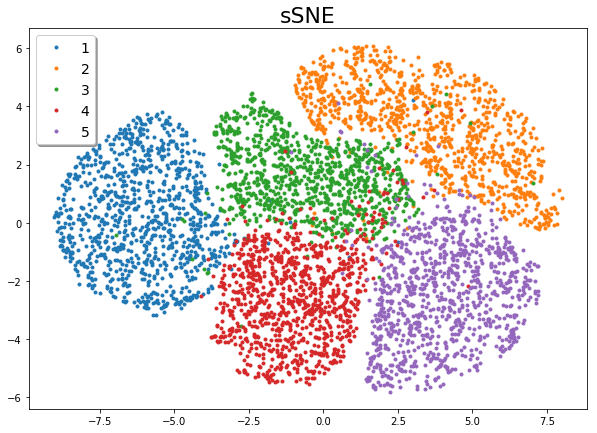

In [12]:
plt.figure(figsize=(10, 7))
for i in range(1, 6):
    data = s_Y[labels == i]
    plt.plot(data[:, 0], data[:, 1], ".", label=str(i))
plt.title("sSNE", fontsize=22)
plt.legend(prop={"size": 14}, shadow=True)
plt.savefig("sSNE.png")

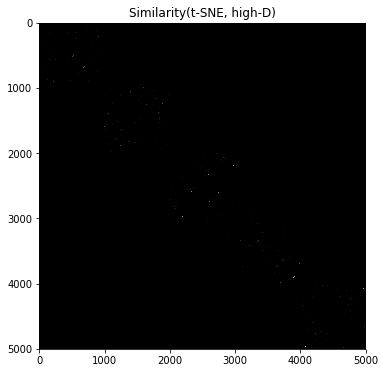

In [13]:
plt.figure(figsize=(6, 6))
plt.imshow(t_P, cmap="gray")
plt.title("Similarity(t-SNE, high-D)")
plt.savefig("tSNE_sim_hi.png")

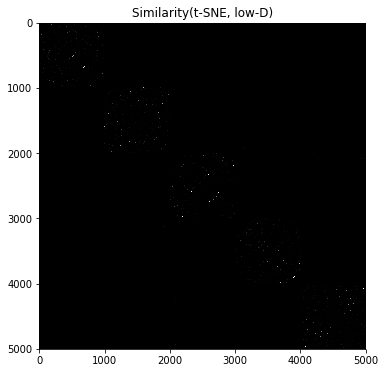

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(t_Q, cmap="gray")
plt.title("Similarity(t-SNE, low-D)")
plt.savefig("tSNE_sim_low.png")

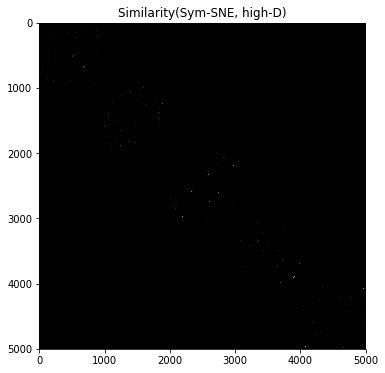

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(s_P, cmap="gray")
plt.title("Similarity(Sym-SNE, high-D)")
plt.savefig("sSNE_sim_hi.png")

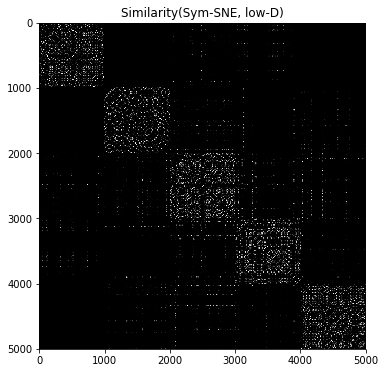

In [16]:
plt.figure(figsize=(6, 6))
plt.imshow(s_Q, cmap="gray")
plt.title("Similarity(Sym-SNE, low-D)")
plt.savefig("sSNE_sim_lo.png")

In [17]:
# Eigenface
import cv2
import os

In [18]:
faces = []
for root, dirs, files in os.walk("./eigfaces"):
    for file in files:
        if file.endswith(".pgm"):
            path = os.path.join(root, file)
            faces.append(cv2.imread(path, -1))
faces = np.array(faces)

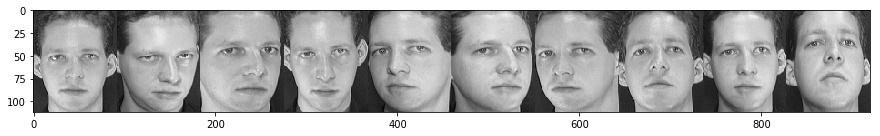

In [19]:
# Test if faces are correctly read
test_faces = faces[0]
for i in range(1, 10):
    test_faces = np.hstack((test_faces, faces[i]))
plt.figure(figsize=(15, 100))
plt.imshow(test_faces, cmap="gray")

In [20]:
faces = np.reshape(faces, (400, 112 * 92))
face, eigface = PCA(faces, dim=25, plot=False)

In [21]:
reshape_eigface = np.reshape(eigface.T, (25, 112, 92))

In [22]:
def displayFaces(faces, row, col):
    display = []
    for i in range(row):
        display.append(np.concatenate(faces[col * i : col * (i + 1)], axis=1))
    display = np.concatenate(display, axis=0)
    plt.imshow(display, cmap="gray")

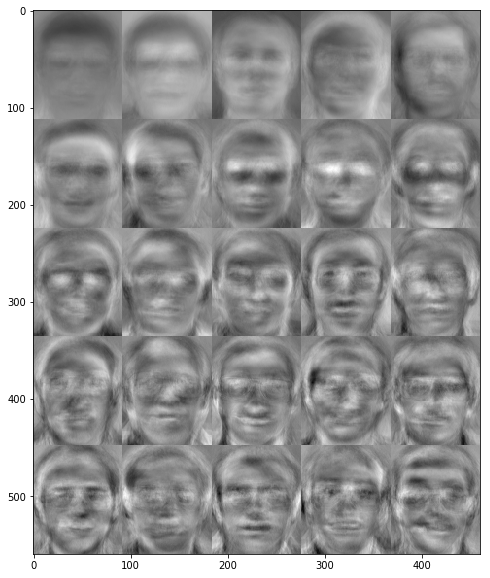

In [23]:
plt.figure(figsize=(10, 10))
displayFaces(reshape_eigface, 5, 5)
plt.savefig("eigfaces.png")

In [30]:
random_idx = np.random.randint(0, 400, size=10)

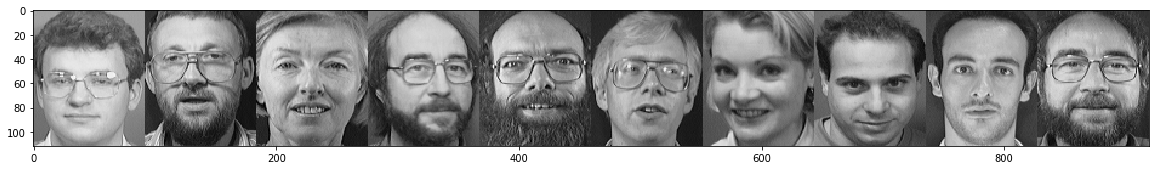

In [31]:
target = faces[random_idx, :]
display_target = np.reshape(target, (10, 112, 92))
plt.figure(figsize=(20, 5))
displayFaces(display_target, 1, 10)
plt.savefig("selected_faces.png")

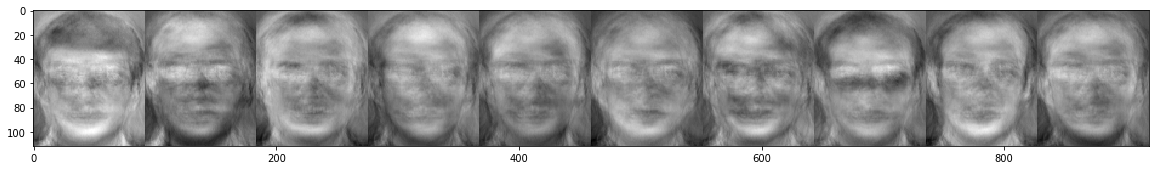

In [32]:
reconstruct_faces = target @ eigface @ eigface.T
reconstruct_faces = np.reshape(reconstruct_faces, (10, 112, 92))
plt.figure(figsize=(20, 5))
displayFaces(reconstruct_faces, 1, 10)
plt.savefig("reconstructed_faces.png")